## Анализ рынка компьютерных игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными, чтобы использовать его в будущем.

### Задача

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Навигация

1. [Открытие файла с данными и изучение общей информации](#start)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#discover)
4. [Проверка статистических гипотез](#stat)
5. [Портрет покупателя каждого региона](#portret) 
6. [Проверка статистических гипотез](#stat)
7. [Общий вывод.](#Conclusion)


## Шаг 1. <a id="start"></a> Открытие файла с данными и изучение общей информации

In [88]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# устраняем возможные баги
pd.options.display.float_format='{:.2f}'.format
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [89]:
games = pd.read_csv('/datasets/games.csv')
print(games.head(10))
games.info()

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii          2006.00        Sports   
1          Super Mario Bros.      NES          1985.00      Platform   
2             Mario Kart Wii      Wii          2008.00        Racing   
3          Wii Sports Resort      Wii          2009.00        Sports   
4   Pokemon Red/Pokemon Blue       GB          1996.00  Role-Playing   
5                     Tetris       GB          1989.00        Puzzle   
6      New Super Mario Bros.       DS          2006.00      Platform   
7                   Wii Play      Wii          2006.00          Misc   
8  New Super Mario Bros. Wii      Wii          2009.00      Platform   
9                  Duck Hunt      NES          1984.00       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45         76.00          8      E  
1     29.08      3.58      6.81         0.77     

### Вывод 

Получив файл для проведения анализа продаж компьютерных игр, была получена информация о файле с 16715 строк и 11 столбцами, включающими в себя следующую информацию:
- Name— название игры
- Platform— платформа
- Year_of_Release— год выпуска
- Genre— жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales— продажи в Европе (миллионы долларов)
- JP_sales— продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score— оценка пользователей (максимум 10)
- Rating— рейтинг от организации ESRB (англ.Entertainment Software Rating Board).

Некоторые столбцы имеют недостатки, которые необходимо предобработать.

## Шаг 2. <a id="preprocessing"></a> Предобработка данных

In [90]:
games['Critic_Score'].unique()  
games['Rating'].unique() 
games['User_Score'].unique() 
games.query('Critic_Score == "NaN"').head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,nan,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.00,Role-Playing,9.00,6.18,7.20,0.71,nan,NaN,NaN
18,Super Mario World,SNES,1990.00,Platform,12.78,3.75,3.54,0.55,nan,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.00,Role-Playing,6.38,4.46,6.04,1.36,nan,NaN,NaN
21,Super Mario Land,GB,1989.00,Platform,10.83,2.71,4.18,0.42,nan,NaN,NaN
22,Super Mario Bros. 3,NES,1988.00,Platform,9.54,3.44,3.84,0.46,nan,NaN,NaN


In [91]:
games.duplicated().sum() # полные дубликаты отсутствуют

0

По результатам изучения столбцов были приняты следующие решения:
1. Пропущенные значения в столбцах Year_of_Release, Genre, Critic_Score - оставляем как есть, поскольку такие пустые значения нельзя получить из информации иных столбцов;
2. Значения в столбце Year_of_Release и Critic_Score заменить на целочисленные (поскольку дробная часть в таких оценках нецелесообразно и несет смысла), а в столбце User_Score заменить на дробные (поскольку оценки пользователей лежат в 10-бальной системе и важны дробные части);
3. В столбце User_Score обнаружены значения - равные 'tbd' (от англ. "to be determined"), которое означает, что оценка пользователем еще не определена, поэтому такие значения можно будет заменить на nan, чтобы не учитывать в общем анализе пользовательских оценок;
4. Для единообразия и избегания ошибок, наименования столбцов нужно привести к единому нижнему регистру, приведем отзывы критиков к формату отзывов пользователей (из стобальной в десятибалльную);
5. В таблице значения доходов по регионам необходимо будет объединить в отдельный столбец с суммарной прибылью.

Большое количество пропусков содержится в столбцах Critic_Score, User_Score, Rating - сложно объяснить с чем это связано, но поскольку срез по данным позволяет сказать, что это не связано с низкой популярностью таких игр, то можно предположить, что отсутствие таких сведений связно с ошибкой выгрузки информации из системы хранения данных о проданных играх, это подтверждает и то, что при формировании среза таблицы с пропущенными значениями оценок критиков видно, что пустые значения также и в столбцах User_Score, Rating. Следовательно, пустые значения носят систематический характер и при наличии возможности целесообразно было бы обратиться к коллегам для проверки причин возникновения таких пропусков.

Обозначения рейтинга игр согласно рейтингу Entertainment Software Rating Board (ESRB):
- 'RP' («Rating Pending») — «Рейтинг ожидается» 
- 'EC' («Early childhood») для детей от 3 лет и старше
- 'E' («Everyone») - «Для всех» от 6 лет и старше, аналогично - 'K-A' ("Kids to Adults") (раньше такое обозначение было) 
- 'E10+' («Everyone 10 and older») — «Для всех от 10 лет и старше»
- 'T' («Teen») — «Подросткам» от 13 лет и старше
- 'M' («Mature») — «Для взрослых» - не подходят для подростков младше 17 лет
- 'AO' («Adults Only 18+») — «Только для взрослых» - для взрослых старше 18 лет

Следовательно, значения с рейтингом "K-A" можно заменить на "Е", чтобы учитывать при составлении зависимостей.

In [92]:
# сделаем названия столбцов нижним регистром
games.columns = games.columns.str.lower()

# преобразуем тип данных в столбцах year_of_release, critic_score
games['year_of_release'] = games['year_of_release'].astype(pd.Int64Dtype())

# для удобства, приведем отзывы критиков к формату отзывов пользователей (из стобальной в десятибалльную)
games['critic_score'] = games['critic_score'].astype(pd.Int64Dtype()) / 10

# обработаем tbd и оценки в столбце user_score
games['user_score'] = games['user_score'].replace('tbd', 'NaN').astype('float64')

# преобразуем старую оценку рейтинга ESRB в столбце rating
games['rating'] = games['rating'].replace('K-A', 'E')

games.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.60,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.20,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,nan,nan,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.90,8.50,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.80,6.60,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.70,8.40,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,nan,nan,NaN


In [93]:
# создаем столбец profit, в который сохраним суммарную прибыль каждой игры во всех регионах
games['profit'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,profit
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.60,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.20,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,nan,nan,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.90,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.80,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.70,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,nan,nan,NaN,28.31


## Шаг 3. <a id="discover"></a> Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

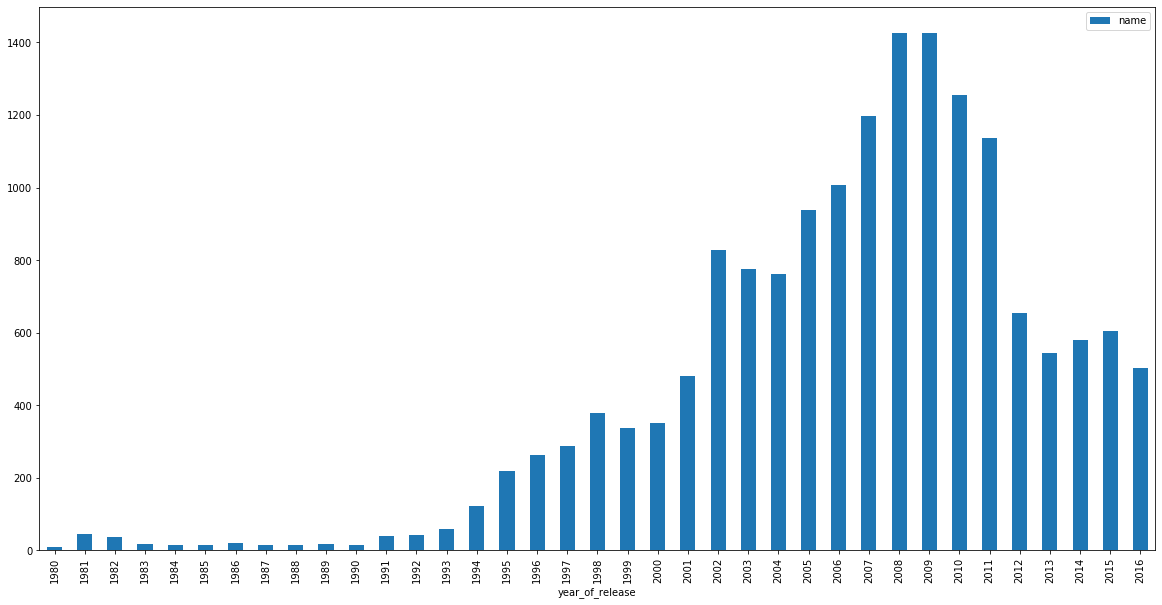

In [94]:
games_year = games.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
games_year.plot(kind='bar', figsize=(20,10))

По результатам изучения продаж по годам видно, что до 2008/2009 года игры выпускались каждый год в большем кол-ве, чем в предыдущем. Однако с 2009 года выпуск игр снижается, необходимо посмотреть, как менялся рынок платформ в эти годы, вполне возможно, что появились "сильные игроки", для платформ которых число игр сократилось, но увеличились бюджеты их производства.

Проверим как менялись продажи игр по платформам.

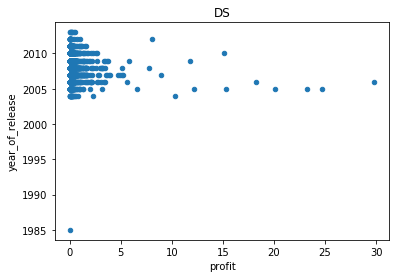

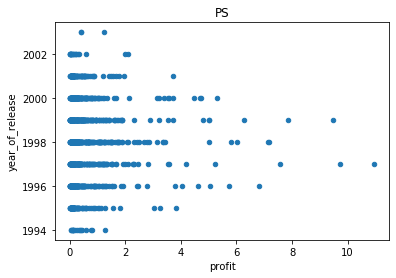

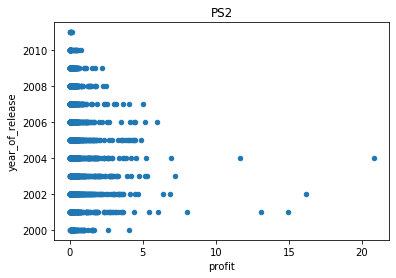

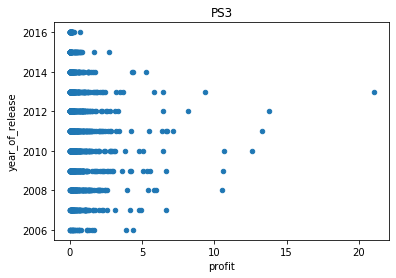

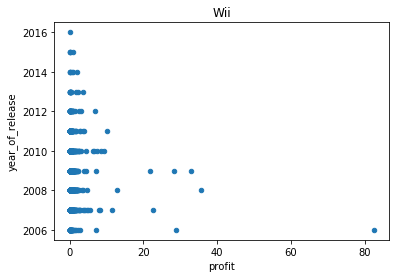

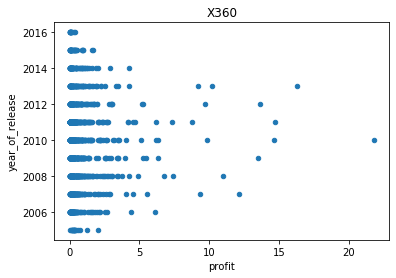

In [95]:
games_platform = (games
                  .pivot_table(index='platform', values='profit', aggfunc='sum')
                  .sort_values(by='profit', ascending=False))

games_platform # следовательно, больше всего прибыли принесли (по возрастанию) платформы - PS2, X360, PS3, Wii, DS, PS.

games_top6 = games.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')

# построим график распределения для самый прибыльных игровых платформ
for name, group_data in games_top6.groupby('platform'):
    group_data.plot(x='profit', y='year_of_release', title=name, kind='scatter')

Таким образом, средний период актуальности игровой платформы, в течение которой производители делают игры, составляет 11 лет. Однако поскольку ранее было обнаружено, что в 2012 году было резкое падение в производстве игр, то целесобразно взять период с 2012 по 2016 год. Это также необходимо и для того, чтобы проводить анализ актуальных игровых платформ, хотя очевидно, что всегда будут любители "олдскула", желающие купить игры, например, для NES или PS, но такие игроки не приносят основной выручки, которую приносят любители новинок и громких премьер для современных платформ.

In [96]:
new_games = games.query('year_of_release >= 2012')
new_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,profit
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.70,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.70,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.30,5.30,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,8.30,4.80,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,nan,nan,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,7.30,2.60,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,7.80,7.20,E,9.90


Ушло почти 13000 игр и 32 года развития геймдизайна. Это большая утрата, но для планирования рекламной кампании на 2017 году эта жертва необходима.

Определим какие платформы лидируют по продажам и динамику по годам. Выберем несколько потенциально прибыльных. Какая консоль популярнее с тем учетом, что данные за 2016 год могут быть неполными?

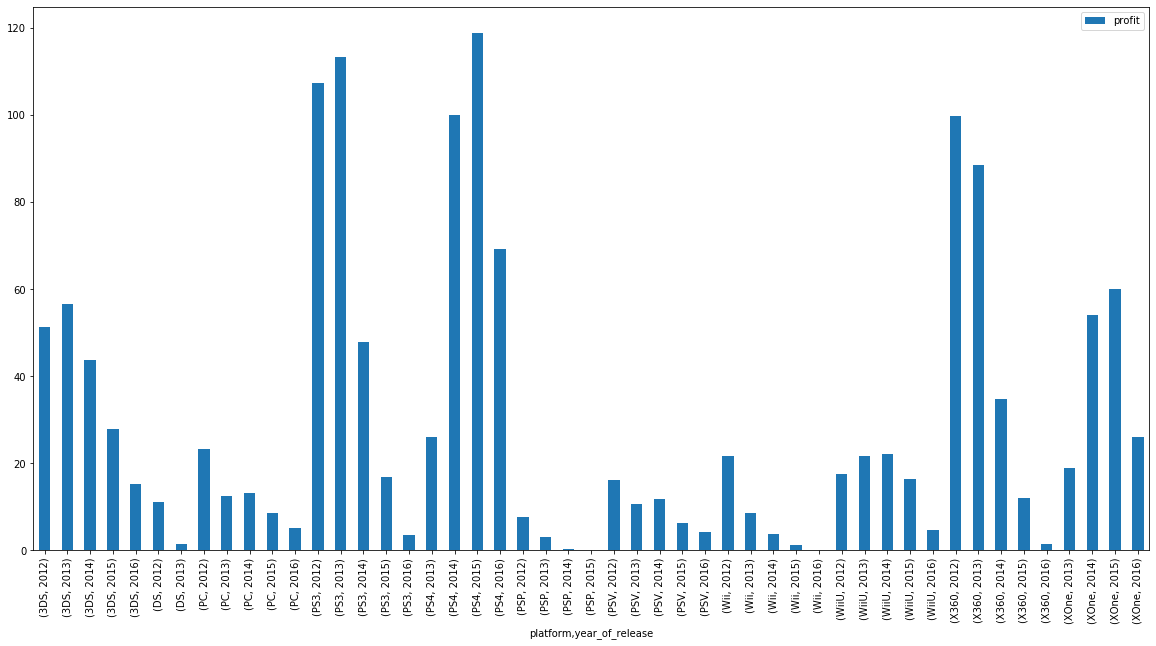

In [97]:
new_games.pivot_table(index=['platform', 'year_of_release'], values='profit', aggfunc='sum').plot(kind='bar', figsize=(20, 10))

Исходя из сводной таблицы можно сделать следующие выводы:
1. Платформы DS, PC, PSP, PSV и Wii - от года в год сдают позиции становятся менее популярны как средство развлечения, это скорее всего связано и с тем, что пользователи переходят на более новые платформы, которые могут предложить игрокам новые технические возможности и эксклюзивы от производителей;
2. Платформы 3DS, PS3, WiiU и X360 - хотя их популярность и снижается, они все еще могут приносить прибыль - это в первую очередь рассчитано на тех игроков, которые еще не сменили свои приставки, но вполне возможно скоро это сделают;
3. PS4 и XOne - наши фавориты, они приносят прибыль с каждым годом все больше и больше. "Новое всегда лучше!"  Именно на эти платформы и следует сделать акцент в рекламной кампании.

#### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

In [98]:
new_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,profit
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.70,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.70,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.30,5.30,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,8.30,4.80,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,nan,nan,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,7.30,2.60,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,7.80,7.20,E,9.90


(0, 2)

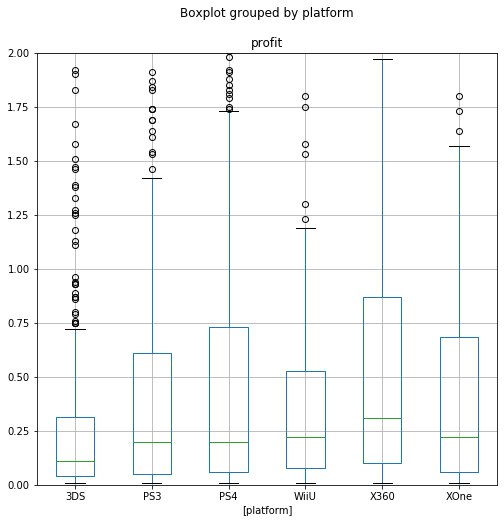

In [99]:
# оставим только те платформы, которые наиболее перспективны, и построим по ним график боксплот ("ящик с усами")

(new_games
 .query('platform == ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]') 
 .pivot_table(index=['name', 'platform'], values='profit') 
 .boxplot(by='platform', figsize=(8,8)))
plt.ylim(0, 2)

Велика ли разница в продажах? 
- Разброс хоть и небольшой, но все же имеется: бо'льший размах нормальных значений имеет платформа X360, на втором месте - PS4. 
- При этом медиана (второй квартиль) у X360 наибольшая из представленных платформ, следовательно, 50% игр, проданных на данной платформе, больше значения медианы, равной размеру прибыли примерно 300 000 долларов.
- Медиана представленных платформ (за исключением 3DS и X360) между собой почти не отличается и находится в диапазоне - 200-240 тыс.долларов.

(0, 0.9)

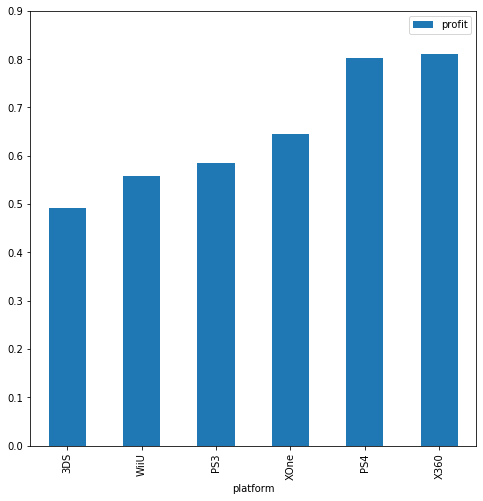

In [100]:
# найдем средние значения по продажам на разных платформах
(new_games
 .query('platform == ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]') 
 .pivot_table(index=['platform'], values='profit', aggfunc='mean')
 .sort_values('profit')
 .plot(kind='bar', by='platform', figsize=(8,8)))
plt.ylim(0, 0.9)

Средние значения по продажам на разных платформах отличаются, при этом:
1. средняя прибыль с игры на платформе 3DS наименьшая и составляет примерно 0.5 млн.долларов;
2. средняя прибыль на PS3 и WiiU примерно равна и немного не доходит 0.6 млн. долларов;
3. прибыль на XOne примерно 0.65 млн. долларов;
4. и самое интересное - средняя прибыль с одной игры на платформе PS4 и X360 примерно равные и составляют 0.8 млн.долларов, хотя медианы у них отличались, следовательно, такие данные имеют большое число выбросов, которые смещают показатели в разные стороны.

#### Проверка влияния на продажи игр на платформе PS4 отзывов пользователей и критиков

Исходная таблица данных, помимо прочего, имела информацию об оценках критиков и пользователей по каждой игре. Интересно проверить как такие отзывы влияют на продажи игр для популярной платформы PS4. Обоснованность выбора такой платформы вызвана следующим:
- прибыль с игр, продаваемых для PS4 максимальна по сравнению с иными платформами, 
- несмотря на меньшую медиану, средняя прибыль с игры для PS4 сопоставима с продажами на X360, 
- это новая платформа, продажи на которой только растут.

,user_score,critic_score,profit
user_score,1.00,0.56,-0.03
critic_score,0.56,1.00,0.41
profit,-0.03,0.41,1.00


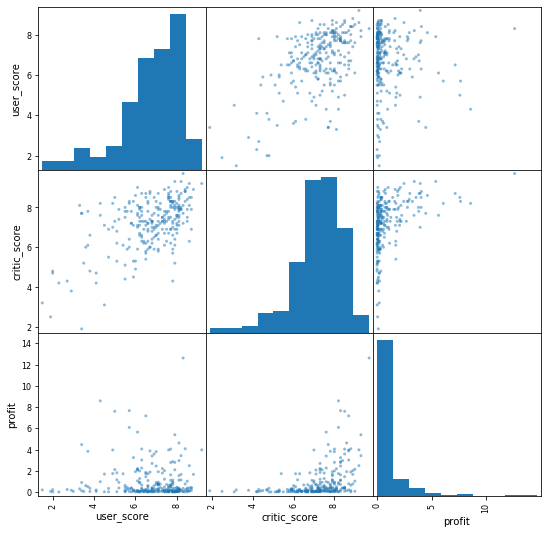

In [101]:
# сделаем срез по данным о продажах на платформе PS4
ps_four = new_games.query('platform == "PS4"')
ps_four = ps_four[['name', 'user_score', 'critic_score', 'profit']]
    
#  матрицу рассеяния
pd.plotting.scatter_matrix(ps_four, figsize=(9,9))

#  матрицу корреляции
ps_four.corr()

Построив матрицу рассеяния получился понятный и наглядный график сразу для трех параметров - прибыли, отзывов критиков и пользователей.
Самый очевидный факт, который привлекает внимание - зависимость между оценками пользователей и критиков - она очевидна и прямая.
На взгляд оценивать зависимость нецелесообразно, поэтому построив матрицу корреляции можно сделать следующие выводы:
1. Коэффициенты по диагонали всегда равны единице, ведь любая величина коррелирует сама с собой.
2. Коэффициент корреляции между оценками пользователей и критиков - 0.56. Это высоко, значит показатели коррелируются, причем корреляции положительная - увеличение одной величины влияет на увеличение другой величины.
3. Корреляции между оценками критиков и продажами - 0.41. Это тоже много, оценки критиков коррелируют (положительная корреляция) с продажами игр и могут влиять на продажи игр. Развития сайтов типа Metacritic и т.д. и их влияние на пользовательские предпочтения растет с каждым годом. Игроки, ориентируясь на подобные ресурсы, скорее предпочтут платить за игру, которую высоко оценили профессиональные критики.
4. Очевидно, что корреляция между пользовательскими оценками и продажами не столь велика - всего "-0.03" - фактически корреляции нет. Нельзя при этом сказать, что зависимости при этом нет. Корреляции не этот вопрос не отвечает, можно только предположить.

С учетом, что PS4 из представленных платформ наиболее перспективна и прибыльна, то можно предположить, что выводы при ее анализе можно распространить и на иные платформы. Можно ниже проверить на еще одном примере, чтобы удостовериться, например, платформы X360.

,user_score,critic_score,profit
user_score,1.00,0.56,0.01
critic_score,0.56,1.00,0.36
profit,0.01,0.36,1.00


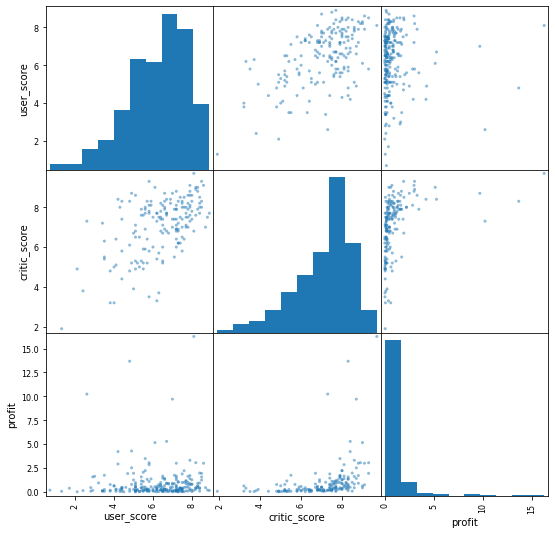

In [102]:
# сделаем срез по данным о продажах на платформе X360
ps_X360 = new_games.query('platform == "X360"')
ps_X360 = ps_X360[['name', 'user_score', 'critic_score', 'profit']]
    
#  матрицу рассеяния
pd.plotting.scatter_matrix(ps_X360, figsize=(9,9))

#  матрицу корреляции
ps_X360.corr()

    Вышеуказанные выводы подтвердились.

#### Проверка распределения прибыли по жанрам.

In [103]:
new_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,profit
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.70,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.70,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.30,5.30,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,8.30,4.80,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,nan,nan,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,7.30,2.60,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,7.80,7.20,E,9.90


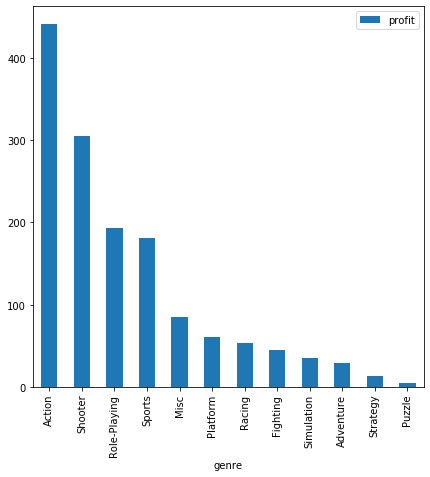

In [104]:
(new_games
 .pivot_table(index='genre', values='profit', aggfunc='sum')
 .sort_values('profit', ascending=False)
 .plot(y='profit', kind='bar', figsize=(7,7)))

Исходя из столбчатой диаграммы видно самые прибыльные и убыточные жанры игр:
1. Самый прибыльный жанр игр - Action. Люди любят испытывать свои способности в незамысловатых, ярких и дорогих проектах. Эти игры рассчитаны на большую аудиторию, в том числе благодаря самоограничениям (отсутствие крови, сцен 18+).
2. Шутеры - второй по общим сборам жанр, хотя почти на четверть ниже, чем у лидера, но при этом на 100 млн.долларов больше, чем у преследователя. Такой жанр имеет много схожего с Экшеном, и даже является его под жанром. Игроки тут более свободны и акцент делается на активном военном подтексте (в СНГ данный жанр получил большее распространение под названием "стрелялки").
3. Самые убыточные жанры (по возрастанию прибыли) - Puzzle, Strategy, Adventure, Simulation, Fighting, Racing, Platform - это игры для более узкой аудитории, очевидно, что много денег с таких продаж не получить.

## Шаг 4. <a id="portret"></a> Портрет покупателя каждого региона

Определим портрет для покупателя каждого региона (NA, EU, JP). Для этого найдем:
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

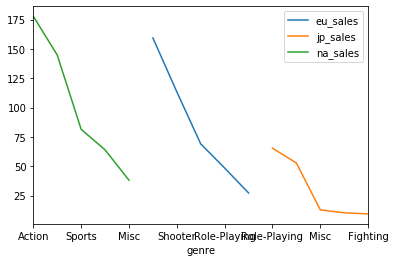

In [105]:
top_genre_na = new_games.pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).head()
top_genre_eu = new_games.pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).head()
top_genre_jp = new_games.pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).head()
top_genre = pd.concat([top_genre_na, top_genre_eu, top_genre_jp], ignore_index=False)

top_genre.plot()

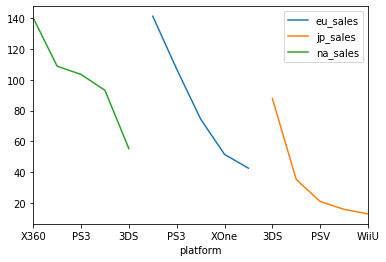

In [106]:
top_platform_na = new_games.pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).head()
top_platform_eu = new_games.pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).head()
top_platform_jp = new_games.pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).head()
top_platform = pd.concat([top_platform_na, top_platform_eu, top_platform_jp], ignore_index=False)

top_platform.plot()

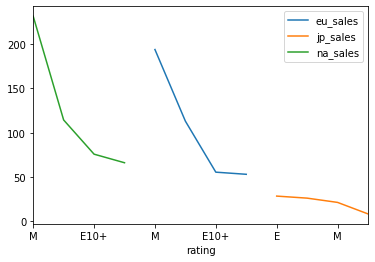

In [107]:
top_rating_na = new_games.pivot_table(index=['rating'], values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).head()
top_rating_eu = new_games.pivot_table(index=['rating'], values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).head()
top_rating_jp = new_games.pivot_table(index=['rating'], values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).head()
top_rating = pd.concat([top_rating_na, top_rating_eu, top_rating_jp], ignore_index=False)

top_rating.plot()

Таким образом, получены следующие "портреты" игроков:
1. Типичный американец - играет в игры жанра Action на платформе X360 с рейтингом М («Для взрослых» - не подходят для подростков младше 17 лет);
2. Типичный европеец - играет в игры жанра Action на платформе PS4 с рейтингом М («Для взрослых» - не подходят для подростков младше 17 лет);
3. Типичный японец - играет в игры жанра Role-Playing на платформе 3DS с рейтингом E («Для всех» от 6 лет и старше).

Такие выводы подтверждают тезис о том, что у американцев и европейцев схожие вкусы (всему причины единое прошлое), при этом даже если сравнивать не первые места рейтингов, а смотреть ниже, то видно, что в целом вкусы этих двух континентов похожи, а в части предпочтений жанров, так вообще идентичны.

Рынок игроков Японии более уникален (всему виной особый путь развития, изоляция от континентального мира). Предпочтения к ролевым играм и компактным платформам обоснованы местным менталитетом, популярностью аниме, манги и прочего, это и говорит о высокой популярности жанра "Ролевых игр".

## Шаг 5. <a id="stat"></a> Проверка статистических гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H₀) - "средние пользовательские рейтинги платформ Xbox One и PC одинаковые". H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. 

Альтернативная гипотеза (H₁) - "средние пользовательские рейтинги платформ Xbox One и PC различаются".

In [108]:
# создаем таблицу с оценками пользователей на платформе PC
new_games__pc = (new_games
                .query('platform == "PC"')
                .pivot_table(index='name', values='user_score'))
new_games__pc

# создаем таблицу с оценками пользователей на платформе Xbox One (XOne)
new_games__xone = (new_games
                .query('platform == "XOne"')
                .pivot_table(index='name', values='user_score'))
new_games__xone.head(10)

,user_score
name,
7 Days to Die,5.20
Agatha Christie's The ABC Murders,7.50
Alien: Isolation,7.80
Angry Birds Star Wars,6.90
Arslan: The Warriors of Legend,5.80
Assassin's Creed Chronicles,6.80
Assassin's Creed IV: Black Flag,7.40
Assassin's Creed Syndicate,6.10
Assassin's Creed The Ezio Collection,7.60


In [109]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

results = st.ttest_ind(new_games__pc, new_games__xone)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

p-значение: [0.55350805]
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые


#### Вывод
В результате проверки гипотезы о равенстве пользовательских рейтингов на платформах Xbox One и PC, было выявлено, что p-значение: 0.55350805.
Полученное значение p-value говорит о том, что скорее всего средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Полученное значение p-value говорит о том, что хотя средний пользовательский рейтинг неодинаков, с вероятностью в почти 55% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между оценками пользователей на платформах Xbox One и PC.

#### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Нулевая гипотеза (H₀) - "средние пользовательские рейтинги жанров Action и Sports равны". 

Альтернативная гипотеза (H₁) - "средние пользовательские рейтинги жанров Action и Sports различаются".

In [110]:
# создаем таблицу с оценками пользователей для жанра Action
new_games__action = (new_games
                .query('genre == "Action"')
                .pivot_table(index='name', values='user_score'))
new_games__action.head(10)

,user_score
name,
7 Days to Die,5.55
Adventure Time: The Secret of the Nameless Kingdom,6.55
Aegis of Earth: Protonovus Assault,8.05
Alan Wake,8.00
Anarchy Reigns,8.05
Angry Birds Trilogy,3.93
Anima - Gate of Memories,7.90
Arslan: The Warriors of Legend,6.20
Art Academy: Lessons for Everyone,7.60


In [111]:
# создаем таблицу с оценками пользователей для жанра Sports
new_games__sports = (new_games
                .query('genre == "Sports"')
                .pivot_table(index='name', values='user_score'))
new_games__sports.head(10)

,user_score
name,
2014 FIFA World Cup Brazil,4.35
Dead or Alive Xtreme 3: Fortune,7.80
Dino Dini's Kick Off Revival,4.50
Don Bradman Cricket 14,7.15
EA Sports UFC,6.20
EA Sports UFC 2,6.10
ESPN: Sports Connection,2.70
FIFA 14,4.34
FIFA 15,4.22


In [112]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

results = st.ttest_ind(new_games__action, new_games__sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны")
    
if new_games__action['user_score'].mean() >  new_games__sports['user_score'].mean():
    print('Средняя оценка игр в жанре Action выше, чем игр в жанре Sports')
else:
    print('Средняя оценка игр в жанре Sports выше, чем игр в жанре Action')

p-значение: [4.43215331e-11]
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются
Средняя оценка игр в жанре Action выше, чем игр в жанре Sports


#### Вывод 
В результате проверки гипотезы о равенстве средних двух генеральных совокупностей - пользовательских рейтингах жанров Action и Sports, было выявлено, что p-значение: 4.43215331e-11 - это крайне малое значение - менее 0,001%, следовательно, есть основания отклонить нулевую гипотезу (но не автоматически отклонить), в таком случае средние пользовательские оценки указанных жанров различается: ответ на вопрос в большую или меньшую сторону p-value методы не дают. 

Однако выяснив средние значения по данным, было выявлено, что "Средняя оценка игр в жанре Action выше, чем игр в жанре Sports". Значит скорее всего и пользовательские оценки игра в жанре Action выше, чем среднепользовательский рейтинг игр в жанре Sports. Это логично, поскольку ранее уже было выяснено, что Action самый прибыльный и самый продаваемый жанр из существующих.

## <a id="Conclusion"></a> Общее заключение

Получив файл для проведения анализа продаж компьютерных игр, была получена информация о файле с 16715 строк и 11 столбцами, включающими в себя следующую информацию:
- Name— название игры
- Platform— платформа
- Year_of_Release— год выпуска
- Genre— жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales— продажи в Европе (миллионы долларов)
- JP_sales— продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score— оценка пользователей (максимум 10)
- Rating— рейтинг от организации ESRB (англ.Entertainment Software Rating Board).

После предобработки и добавления необходимых столбцов были получены следующие выводы, которые необходимо учесть при планировании  рекламной кампании на 2017 г.:
1.	больше всего прибыли за все время с 1980 г. принесли (по возрастанию) платформы - PS2, X360, PS3, Wii, DS, PS, - при этом средний срок, когда платформа популярная и востребована составляет примерно 10 лет;
2.	самые прибыльные платформы для прогнозирования продаж на 2017 г. являются PS4 и XOne – выбор игроками платформ современного поколения очевиден – «Новое всегда лучше!»;
3.	по результатам изучения влияния оценок пользователей и критиков на продажи игр на примере платформы PS4 было выявлено, что на продажи игр могут влиять оценки профессиональных критиков, но не пользователей;
4.	Самый прибыльный жанр игр – Action и Shooter; самые убыточные жанры (по возрастанию прибыли) - Puzzle, Strategy, Adventure, Simulation, Fighting, Racing, Platform - это игры для более узкой аудитории, очевидно, что много денег с таких продаж не получить;
5.	Типичный портеры игроков:
Типичный американец - играет в игры жанра Action на платформе X360 с рейтингом М («Для взрослых» - не подходят для подростков младше 17 лет);
Типичный европеец - играет в игры жанра Action на платформе PS4 с рейтингом М («Для взрослых» - не подходят для подростков младше 17 лет);
Типичный японец - играет в игры жанра Role-Playing на платформе 3DS с рейтингом E («Для всех» от 6 лет и старше).

6.	При проверке гипотезы – «Средние пользовательские рейтинги платформ Xbox One и PC одинаковые» было выяснено, что с большой вероятностью это верно, утверждать однозначно при этом невозможно.
7.	В результате проверки гипотезы – «Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные» можно предположить, что она подтвердилась.
